# Import Libraries


In [ ]:
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten , Dropout,BatchNormalization
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
import warnings
warnings.filterwarnings("ignore")


# Import Dataset



# **handle filepaths**

In [2]:
labels=[]
folddir="/kaggle/input/revitsone-5class/Revitsone-5classes"
folders=os.listdir(folddir)
for fold in folders:
    labels.append(fold)
    foldpath=os.path.join(folddir,fold)
    print(foldpath)
    

/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities
/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone
/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving
/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone
/kaggle/input/revitsone-5class/Revitsone-5classes/turning


In [3]:
labels

['other_activities',
 'talking_phone',
 'safe_driving',
 'texting_phone',
 'turning']

In [4]:

others_activities=[]
for other in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities"):
    if other.endswith(".png") or other.endswith(".jpg"): 
        others_activities.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities", other))
safe_driving=[]
for image_safe in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving"):
    if image_safe.endswith(".png") or image_safe.endswith(".jpg"): 
        safe_driving.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving", image_safe))
talking_phone=[]
for phonetalk in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone"):
    if phonetalk.endswith(".png") or phonetalk.endswith(".jpg"): 
        talking_phone.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone", phonetalk))
texting_phone=[]
for textpone in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone"):
    if textpone.endswith(".png") or textpone.endswith(".jpg"): 
        texting_phone.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone", textpone))
turning=[]
for turn in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/turning"):
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        turning.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning", turn))


In [5]:
print(texting_phone[0],"\n",turning[0],"\n",talking_phone[0],"\n",safe_driving[0],"\n",others_activities[0])


/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone/img_38942.jpg 
 /kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_13562.jpg 
 /kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone/img_4913.jpg 
 /kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving/img_12470.jpg 
 /kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_25688.jpg


# Remove Unreaded Image

In [6]:

others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_79.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_4664.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_7973.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13318.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13396.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13541.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13625.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_20398.jpg')
others_activities.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_22266.jpg')

turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_8771.jpg')
turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_62337.jpg')
turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_67523.jpg')
turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_70552.jpg')
turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_84605.jpg')
turning.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_101434.jpg')

# Make a DataFrame

In [7]:

data = []

for path in others_activities:
    data.append((path, "others_activities"))

for path in safe_driving:
    data.append((path, "safe_driving"))

for path in talking_phone:
    data.append((path, "talking_phone"))

for path in texting_phone:
    data.append((path, "texting_phone"))

for path in turning:
    data.append((path, "turning"))

df = pd.DataFrame(data, columns=["image_path", "label"])
df.head(10)

image_path              label
5838   /kaggle/input/revitsone-5class/Revitsone-5clas...      talking_phone
3320   /kaggle/input/revitsone-5class/Revitsone-5clas...       safe_driving
1486   /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
8844   /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
8205   /kaggle/input/revitsone-5class/Revitsone-5clas...      texting_phone
7189   /kaggle/input/revitsone-5class/Revitsone-5clas...      texting_phone
10167  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
6568   /kaggle/input/revitsone-5class/Revitsone-5clas...      texting_phone
3538   /kaggle/input/revitsone-5class/Revitsone-5clas...       safe_driving
121    /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10751 entries, 0 to 10750
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  10751 non-null  object
 1   label       10751 non-null  object
dtypes: object(2)
memory usage: 168.1+ KB


# Split Data To Train, Test, Validation 

In [9]:
train_df,test_df=train_test_split(df,test_size=0.2,stratify=df["label"])
train_df,valid_df=train_test_split(train_df,test_size=0.2,stratify=train_df["label"])


In [10]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(valid_df))

Number of rows in train dataframe is:  6880
Number of rows in test dataframe is:  2151
Number of rows in val dataframe is:  1720


# Show sample of Image

In [11]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

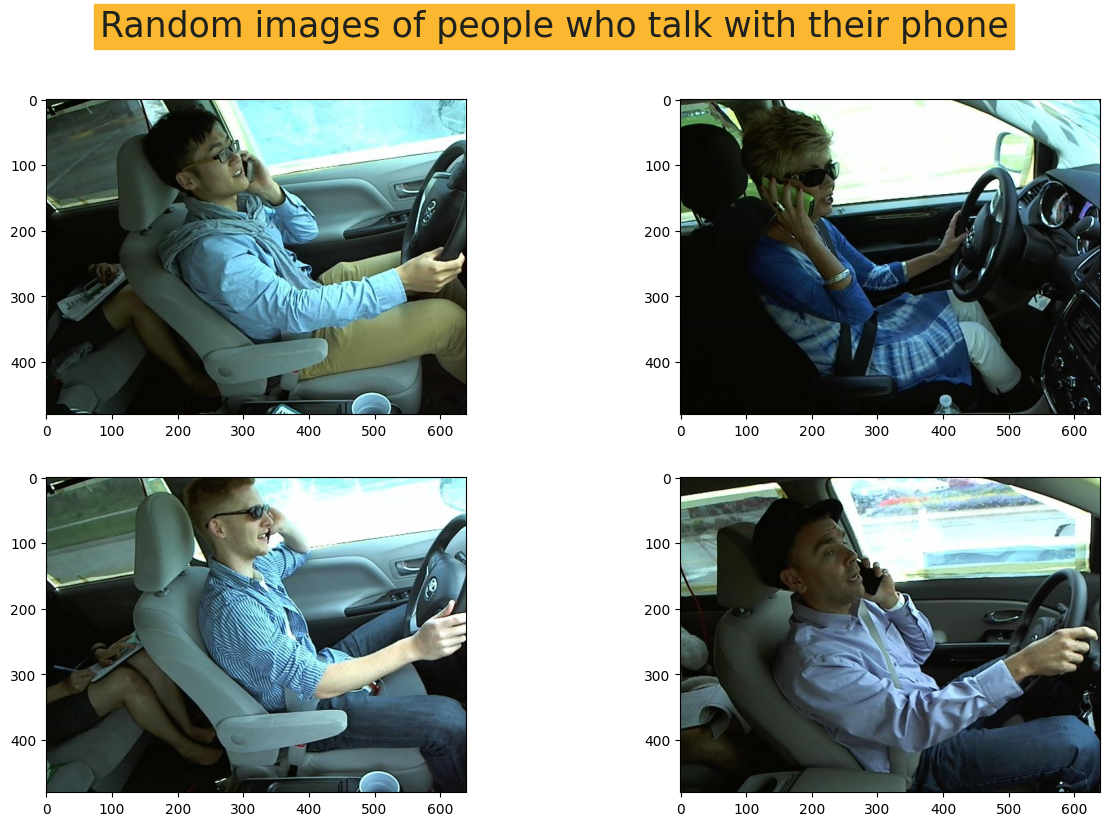

In [12]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(talking_phone)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

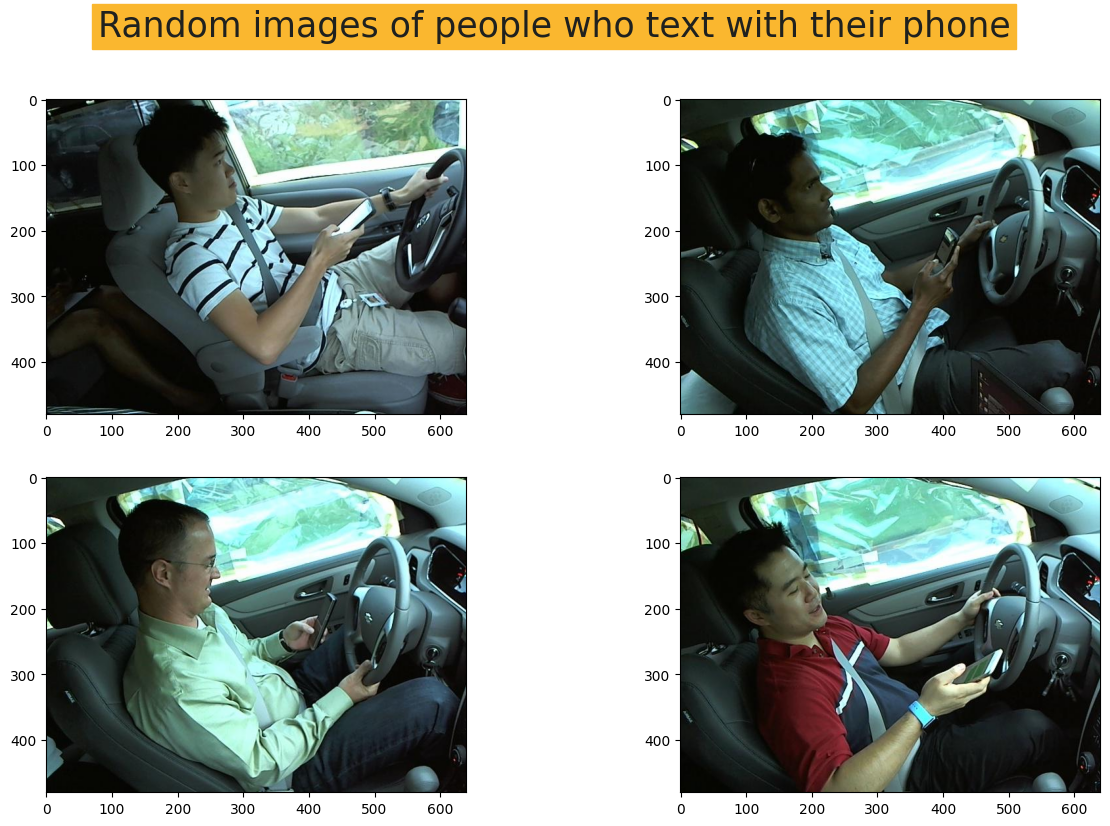

In [13]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(texting_phone)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

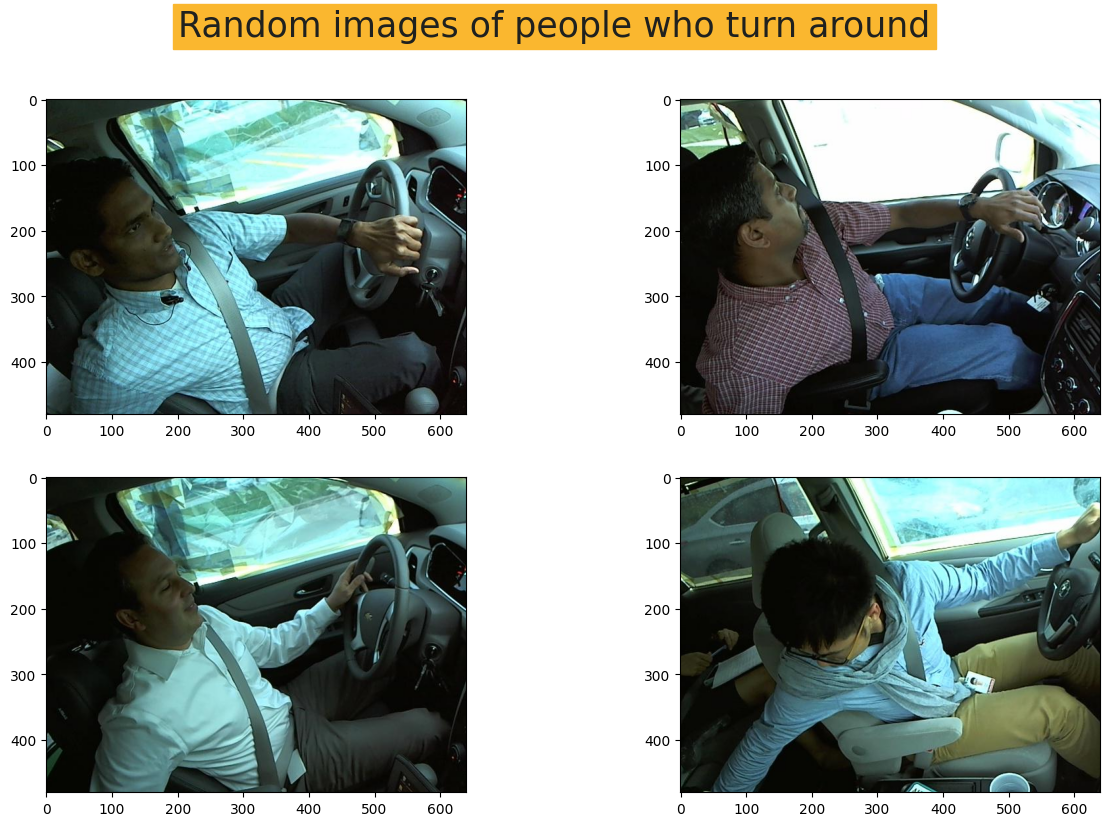

In [14]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(turning)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

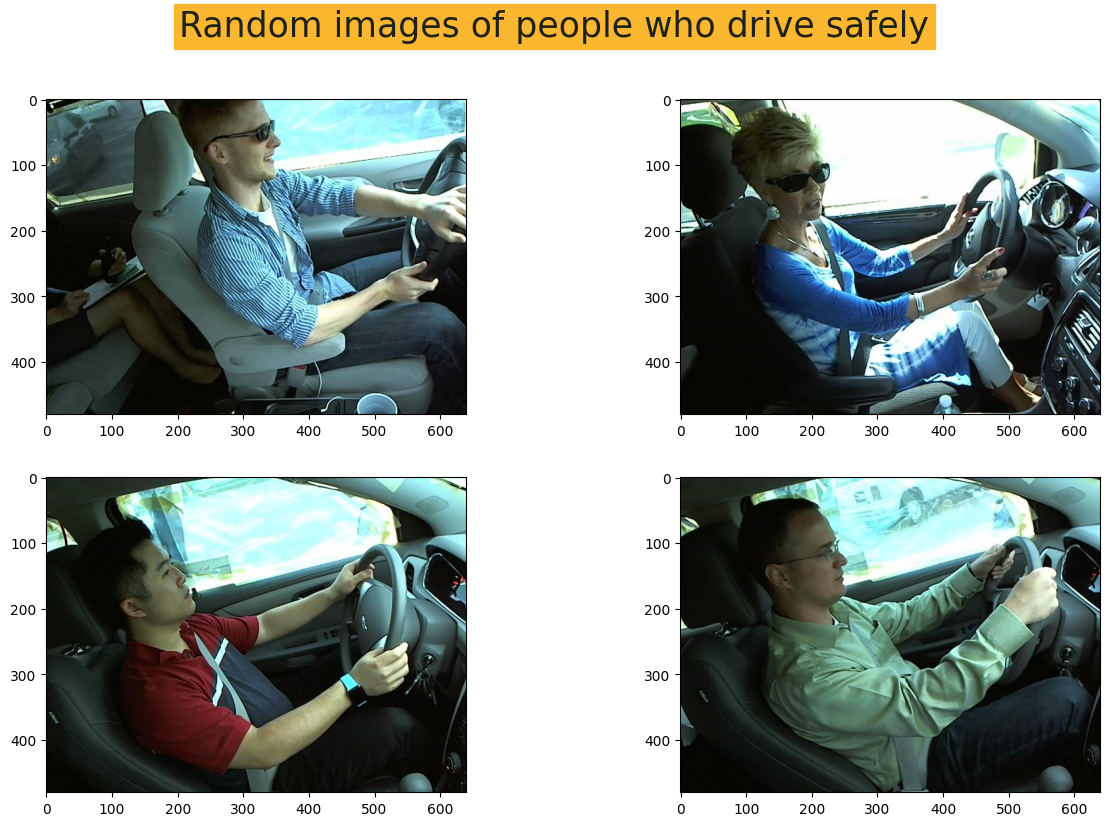

In [15]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(safe_driving)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()


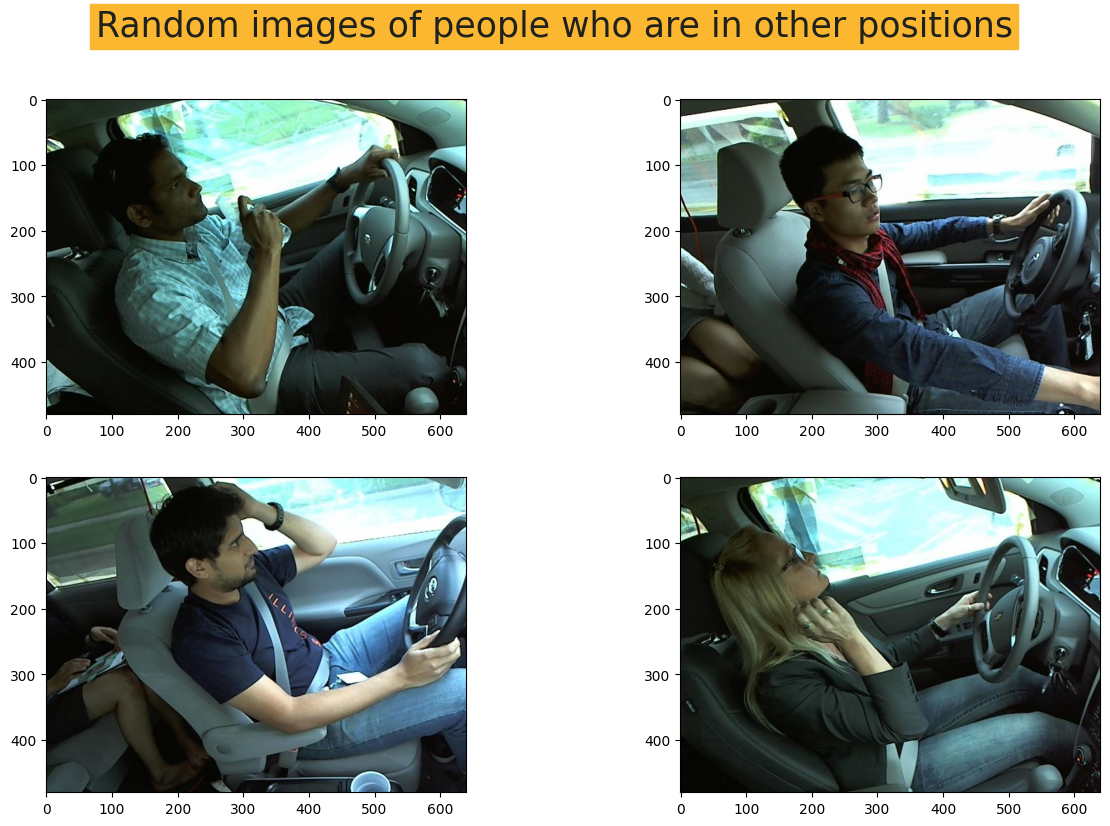

In [16]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(others_activities)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

# Image Agummentation and Preprocessing 

In [17]:
gen=ImageDataGenerator(rescale=1./255)
train_gen=gen.flow_from_dataframe(train_df,x_col="image_path",y_col="label",target_size=(240,240),color_mode="rgb",class_mode="categorical",patch_size=64)
test_gen=gen.flow_from_dataframe(test_df,x_col="image_path",y_col="label",target_size=(240,240),color_mode="rgb",class_mode="categorical",patch_size=16)
valid_gen=gen.flow_from_dataframe(valid_df,x_col="image_path",y_col="label",target_size=(240,240),color_mode="rgb",class_mode="categorical",patch_size=8)

Found 6880 validated image filenames belonging to 5 classes.
Found 2151 validated image filenames belonging to 5 classes.
Found 1720 validated image filenames belonging to 5 classes.


# Modeling

# VGG NET  Architecture 

In [18]:
model=Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(240,240,3)),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(256,(3,3),activation='relu'),
    Conv2D(256,(3,3),activation='relu'),
    Conv2D(256,(3,3),activation='relu'),       
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(512,(3,3),activation='relu'),
    Conv2D(512,(3,3),activation='relu'),
    Conv2D(512,(3,3),activation='relu'),       
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax'),
                               
])
model.summary()           

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 238, 238, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 236, 236, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 236, 236, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 118, 118, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 116, 116, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 114, 114, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 114, 114, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 55, 55, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 53, 53, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 51, 51, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 51, 51, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 23, 23, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 19, 19, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     169,873,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │              

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [19]:
model.compile(optimizer=Adamax(learning_rate=0.001),loss="categorical_crossentropy", metrics=['accuracy'])

# Train Model

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,          
    restore_best_weights=True 
)

In [21]:
VGG_model = model.fit(train_gen, epochs=20, validation_data=valid_gen,callbacks=[early_stopping])


Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 130s 473ms/step - accuracy: 0.4048 - loss: 6.5145 - val_accuracy: 0.2093 - val_loss: 3.2497
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - accuracy: 0.8401 - loss: 0.4737 - val_accuracy: 0.3326 - val_loss: 2.7280
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.9235 - loss: 0.2298 - val_accuracy: 0.8070 - val_loss: 0.5622
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 257ms/step - accuracy: 0.9531 - loss: 0.1408 - val_accuracy: 0.9163 - val_loss: 0.2550
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.9641 - loss: 0.1068 - val_accuracy: 0.9494 - val_loss: 0.1440
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 56s 256ms/step - accuracy: 0.9813 - loss: 0.0663 - val_accuracy: 0.9616 - val_loss: 0.1185
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 54s 249ms/step - accuracy: 0.9749 - loss: 0.0709 - val_accuracy: 0.9610 - val_loss: 0.1220
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 55s 251ms/step - accuracy: 0.9864 - loss: 

# Evaluate Model

In [22]:
train_score = model.evaluate(train_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.9981 - loss: 0.0070
68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 364ms/step - accuracy: 0.9746 - loss: 0.1609
Train Loss:  0.00857631303369999
Train Accuracy:  0.9975290894508362
--------------------
Test Loss:  0.15033778548240662
Test Accuracy:  0.9725708961486816


In [23]:
df

image_path              label
0      /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
1      /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
2      /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
3      /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
4      /kaggle/input/revitsone-5class/Revitsone-5clas...  others_activities
...                                                  ...                ...
10746  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
10747  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
10748  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
10749  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning
10750  /kaggle/input/revitsone-5class/Revitsone-5clas...            turning

[10751 rows x 2 columns]

# Save Model

In [26]:
model.save("driverbehaviordetection.h5")

# Load and Test Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


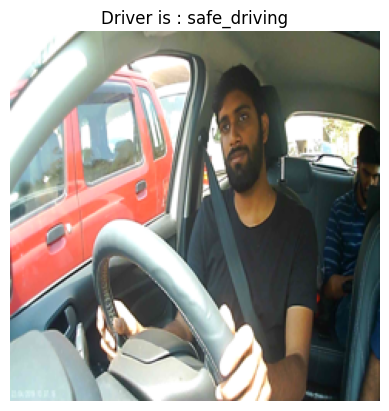

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

model = tf.keras.models.load_model("/kaggle/working/driverbehaviordetection.h5")

classes = ['other_activities', 'safe_driving','talking_phone', 'texting_phone', 'turning']

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((240, 240))  
    img_array = np.array(image) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]
    
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Driver is : {predicted_class}")
    plt.show()

image_path = "/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving/2019-04-2416-18-11.png"  
predict_image(image_path)


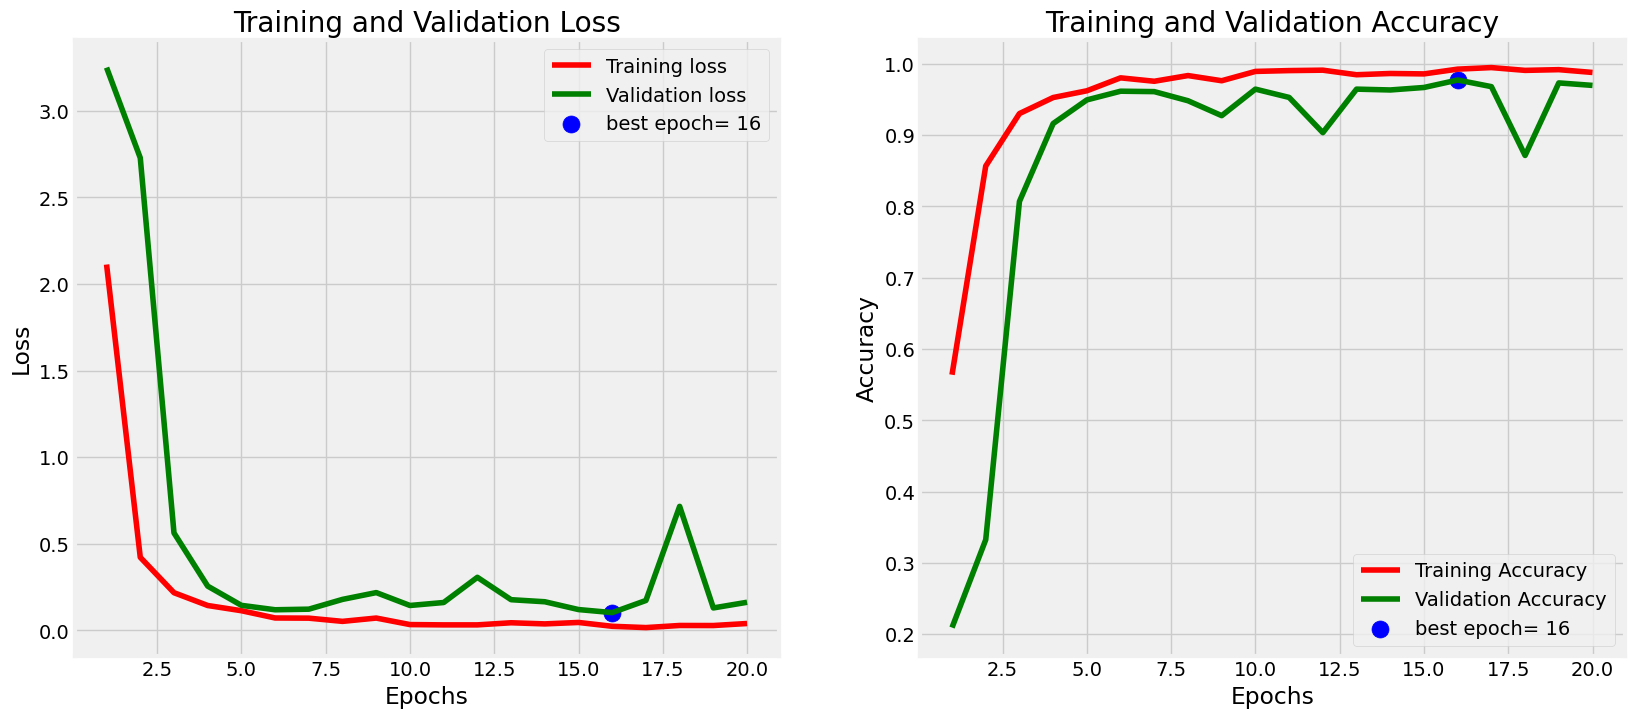

In [29]:
tr_acc = VGG_model.history['accuracy']
tr_loss = VGG_model.history['loss']
val_acc = VGG_model.history['val_accuracy']
val_loss = VGG_model.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()